# はじめてのニューラルネットワーク：分類問題の初歩
https://www.tensorflow.org/tutorials/keras/classification

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.6.0


In [23]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
print(train_images.shape, train_labels)

(60000, 28, 28) [9 0 0 ... 3 0 5]


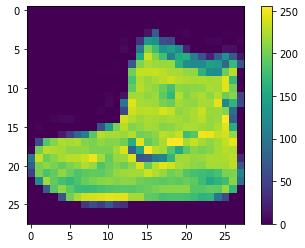

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

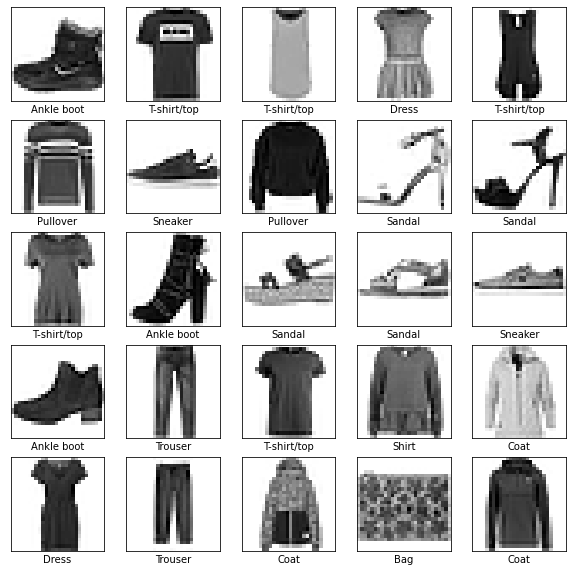

In [26]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [28]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)

In [29]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [30]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4993 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3761 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3362 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3129 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2932 - accuracy: 0.8918


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy: ", test_acc)

313/313 - 0s - loss: 0.3536 - accuracy: 0.8742

Test accuracy:  0.8741999864578247


In [32]:
predictions = model.predict(test_images)

In [33]:
print(predictions[0])
print("Most reliable label: ", np.argmax(predictions[0]))

[3.0573878e-07 1.7597776e-08 2.3707342e-07 6.7986408e-09 2.8166042e-08
 6.8412331e-04 7.7295755e-07 3.9529637e-02 1.2538260e-05 9.5977223e-01]
Most reliable label:  9


In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

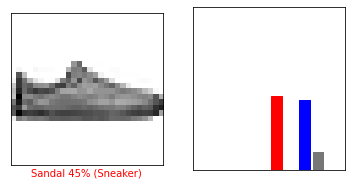

In [35]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

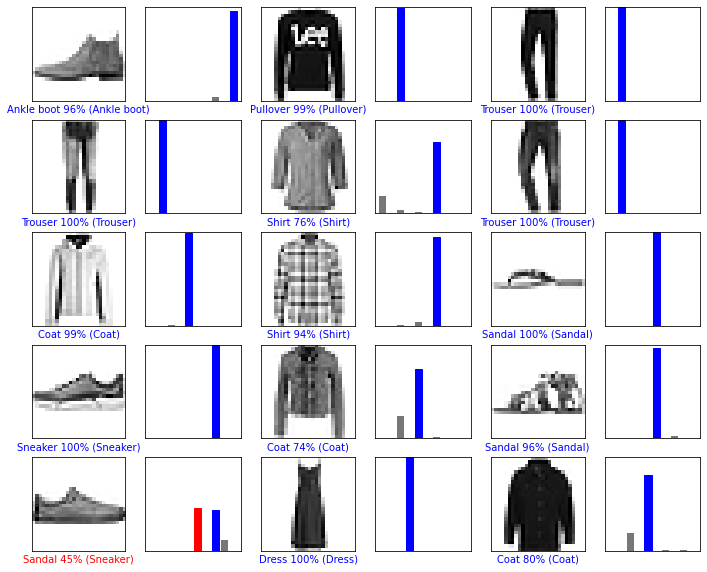

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[3.0573935e-07 1.7597742e-08 2.3707365e-07 6.7986274e-09 2.8166042e-08
  6.8412302e-04 7.7295829e-07 3.9529730e-02 1.2538271e-05 9.5977223e-01]]
Most reliable Label:  9


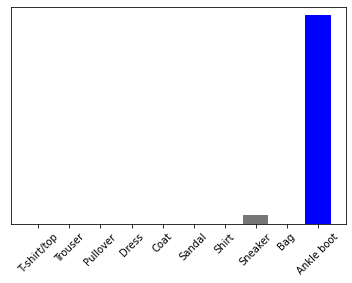

In [39]:
img = test_images[0]
print(img.shape)
img = np.expand_dims(img, 0)
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)

print("Most reliable Label: ", np.argmax(predictions_single[0]))

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)